# Setup

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, DBSCAN

data: pd.DataFrame = pd.read_csv(
    filepath_or_buffer="../data_processing/cleaned_dataset.csv"
)

# Prepare Data

In [63]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80728 entries, 0 to 80727
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      80728 non-null  int64  
 1   Unnamed: 0        80728 non-null  int64  
 2   popularity        80728 non-null  int64  
 3   duration_s        80728 non-null  float64
 4   explicit          80728 non-null  int64  
 5   danceability      80728 non-null  float64
 6   energy            80728 non-null  float64
 7   key               80728 non-null  int64  
 8   loudness          80728 non-null  float64
 9   mode              80728 non-null  int64  
 10  speechiness       80728 non-null  float64
 11  acousticness      80728 non-null  float64
 12  instrumentalness  80728 non-null  float64
 13  liveness          80728 non-null  float64
 14  valence           80728 non-null  float64
 15  tempo             80728 non-null  float64
 16  time_signature    80728 non-null  int64 

,Unnamed: 0.1,Unnamed: 0,popularity,duration_s,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,93933,93933,0,141.506,0,0.3950,0.135,6,-17.867,0,0.0417,0.948,0.000017,0.109,0.179,93.235,3,romance
1,93638,93638,0,150.000,0,0.5390,0.207,2,-14.622,0,0.0518,0.975,0.000033,0.143,0.814,96.037,4,romance
2,93836,93836,0,197.786,0,0.3340,0.180,6,-14.943,0,0.0645,0.992,0.000005,0.147,0.112,83.135,1,romance
3,76134,76134,0,292.173,0,0.2790,0.273,3,-9.885,1,0.0320,0.984,0.005810,0.136,0.183,66.886,4,opera
4,16034,16034,0,283.933,0,0.0965,0.200,10,-16.970,1,0.0393,0.967,0.958000,0.169,0.238,78.351,4,classical


# Feature Selection and Engineering

In [70]:
cluster_df = data.copy().sample(n=1000)
cluster_df = cluster_df.drop(columns=["Unnamed: 0.1", "Unnamed: 0", "track_genre"])

cluster_df.head()

,popularity,duration_s,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
25919,24,216.543,0,0.630,0.644,9,-7.340,1,0.0306,0.4020,0.003790,0.2630,0.697,107.392,4
30097,27,242.760,0,0.548,0.960,9,-2.138,1,0.0698,0.2420,0.000000,0.3330,0.841,152.004,4
51992,43,138.837,0,0.819,0.734,3,-6.240,0,0.0991,0.4960,0.000000,0.0842,0.962,172.021,4
7691,9,147.727,0,0.759,0.565,4,-14.210,0,0.0497,0.0317,0.864000,0.1610,0.598,121.012,4
24049,23,171.133,0,0.453,0.285,1,-9.107,0,0.0522,0.9820,0.000009,0.3040,0.507,73.757,3


/tmp/ipykernel_1149/1907750347.py:13: UserWarning: 
The palette list has fewer values (10) than needed (50) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


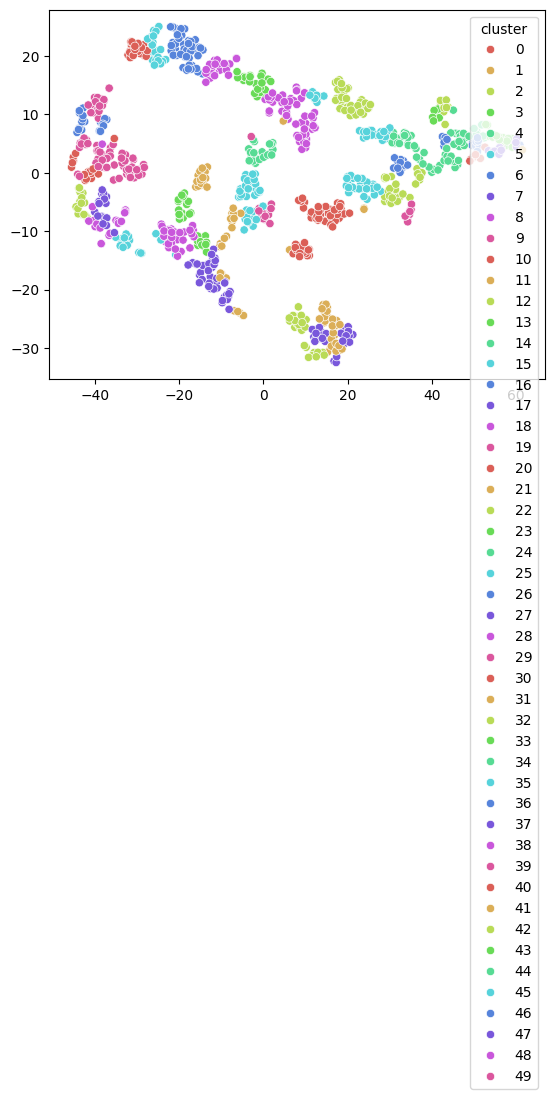

/tmp/ipykernel_1149/1907750347.py:13: UserWarning: 
The palette list has fewer values (10) than needed (50) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


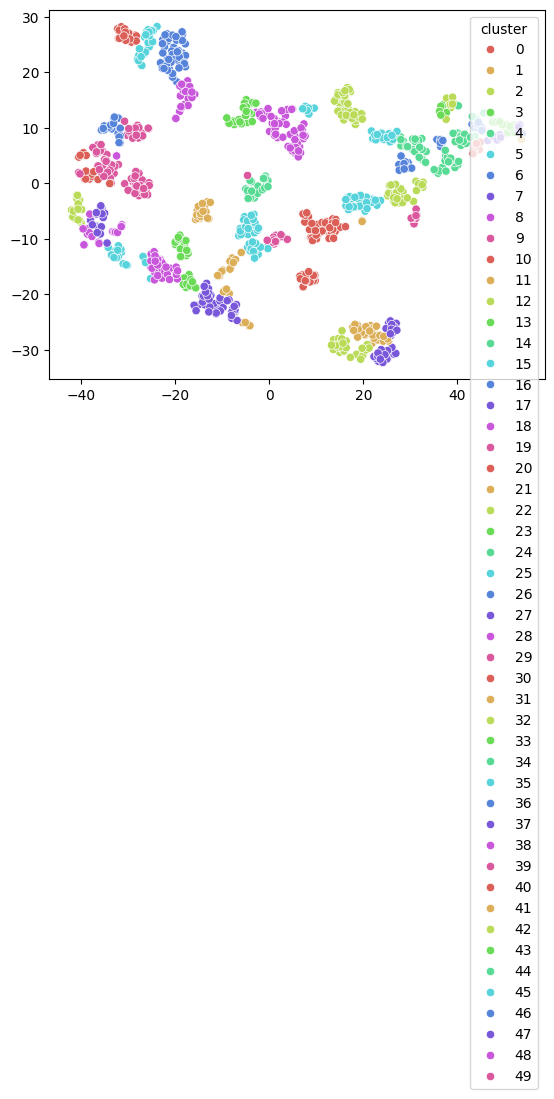

In [79]:
from sklearn.manifold import TSNE

def plot_tsne(df: pd.DataFrame, method: str):
    tsne: TSNE = TSNE(
        n_components=2,
        random_state=0,
        max_iter=1000,
        n_iter_without_progress=100,
        metric=method
    )
    tsne_df = tsne.fit_transform(df.select_dtypes(exclude=["object"]))

    sns.scatterplot(
        x=tsne_df[:, 0],
        y=tsne_df[:, 1],
        hue=df["cluster"],
        palette=sns.color_palette("hls", 10),
    )
    plt.show()

kmeans = KMeans(n_clusters=50)
kmeans.fit(cluster_df)
cluster_df["cluster"] = kmeans.labels_

for method in ["l2", "l1"]:
    plot_tsne(df=cluster_df, method=method)